<p style="font-family: Arial; font-size:2.75em;color:maroon; font-style:bold">
Classification of Diabetes Data Using scikit-learn
</p>

<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold">
Importing the Necessary Libraries
<br></p>



In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold">
Creating a Pandas DataFrame from a CSV file
<br></p>



In [102]:
data = pd.read_csv('diabetes.csv')
# data ref:  kaggle.com
# code ref: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [103]:
print(data.shape)
data.head()

(2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [105]:
filter1 = data['Glucose'] != 0 
filter2 = data['BloodPressure'] != 0
filter3 = data['SkinThickness'] != 0
filter4 = data['BMI'] != 0
filter5 = data['Insulin'] != 0
data_cleaned = data[filter1 & filter2 & filter3 & filter4 & filter5]

In [106]:
data_cleaned.shape

(1035, 9)

<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold">
Prepare Input: X
<br></p>



In [108]:
#create a dataframe with all columns except the target column. These columns will be input features
#X = data.drop(columns=['Outcome'])
#check that the target variable has been removed
X = data_cleaned.drop(['Outcome'], axis = 1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,0,84,82,31,125,38.2,0.233,23
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
5,0,173,78,32,265,46.5,1.159,58
8,2,83,65,28,66,36.8,0.629,24


<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold">
Prepare Onput: y
<br></p>



In [110]:
#separate target values
#y = data_cleaned['Outcome'].values
y = data_cleaned[['Outcome']] 
print(type(y))
#view target values
y[0:5]


<class 'pandas.core.frame.DataFrame'>


,Outcome
1,0
3,1
4,0
5,0
8,0


In [111]:
print("X.shape: ", X.shape, "y.shape: ", y.shape)

X.shape:  (1035, 8) y.shape:  (1035, 1)


<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold"><br>
Split Data into training set and testing set<br>
    
After that, 
1. Use training set to train the KNN model with n-fold cross validation to get the best KNN model 
2. Test the KNN model's performance using test set, since we will compare the performance of KNN with that of Decision Tree.
<br></p>


In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(693, 8)
(693, 1)
(342, 8)
(342, 1)


In [115]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train
#y_train.describe()

<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold"><br>
Feature Scaling
<br></p>



In [117]:
# Scale data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:3]

array([[-0.69084809, -0.42600819, -1.22891239, -0.7439352 , -0.17125154,
        -1.13838947,  0.96611514, -0.77499376],
       [-0.36801752, -1.2458007 , -1.72453001, -0.55636122, -0.71416551,
        -0.40694607,  1.38275255, -0.98002169],
       [-0.69084809,  0.68890961,  1.24917573,  0.10014773,  1.62312516,
        -0.44914473,  1.14820112, -0.77499376]])

<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold"><br>
Hyperparameter tuning using GridSearchCV
<br></p>



GridSearchCV works by training our model multiple times on a range of hyperparameters that we specify. In doing so, we can test our model with each hyperparameter combination and figure out the optimal model to get the best performance.

For our model, we will specify a range of values for ‘n_neighbors’ in order to see which value works best for our model. To do this, we will create a dictionary, setting ‘n_neighbors’ as the key and using numpy to create an array of values from 1 to 24.

In [120]:

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
k_range = np.arange(1, 25,2)
param_grid = {'n_neighbors':k_range}
#or:
#param_grid = dict(n_neighbors = k_range)

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
 
#fit model to data
knn_gscv.fit(X_train_scaled, y_train)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])})

In [121]:
#check top performing n_neighbors value
best_K_Value = knn_gscv.best_params_
print('Best K value: ', best_K_Value)


Best K value:  {'n_neighbors': 1}


<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold"><br>
Training and testing accuracy
<br></p>



In [123]:
# Extract best CV score from knn_gscv. This is the training accuracy
print('Best training accuracy: ', knn_gscv.best_score_)

Best training accuracy:  0.9408299447398603


In [124]:
 # Extract best model
best_model = knn_gscv.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test_scaled,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))
 

Test set accuracy of best model: 0.944


<p style="font-family: Arial; font-size:1.75em;color:navy; font-style:bold">
Show feature importance
<br></p>


/var/folders/9m/brj5dz214t77hy00y15pwt380000gn/T/ipykernel_25917/3931509189.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


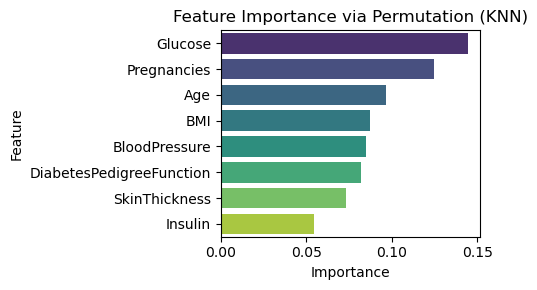

In [126]:
from sklearn.inspection import permutation_importance
# Feature importance using permutation
perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=30, random_state=42)
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance via Permutation (KNN)')
plt.tight_layout()


<p style="font-family: Arial; font-size:1.75em;color:#FF5733; font-style:bold">
Practice 1: Show confusion Matrix
<br></p>

**Hints**: use the predict() function to predict y values for the test data.


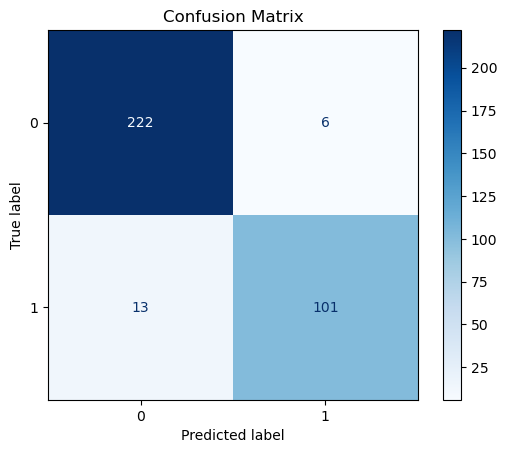

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Step 1: Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues') 
plt.title("Confusion Matrix")
plt.show()


<p style="font-family: Arial; font-size:1.75em;color:#FF5733; font-style:bold">
Practice 2: Show the classification report
<br></p>


In [130]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_test, y_pred = best_model.predict(X_test_scaled))
print(report) 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       228
           1       0.94      0.89      0.91       114

    accuracy                           0.94       342
   macro avg       0.94      0.93      0.94       342
weighted avg       0.94      0.94      0.94       342

